In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.layers import Dense, Dropout, Input
from keras.models import Model,Sequential
from keras.datasets import mnist
from tqdm import tqdm
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import adam

In [0]:
def load_data():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train = (x_train.astype(np.float32) - 127.5)/127.5
    
    # convert shape of x_train from (60000, 28, 28) to (60000, 784) 
    # 784 columns per row
    x_train = x_train.reshape(60000, 784)
    return (x_train, y_train, x_test, y_test)

(X_train, y_train,X_test, y_test)=load_data()
print(X_train.shape)

(60000, 784)


In [0]:
def adam_optimizer():
    return adam(lr=0.0002, beta_1=0.5)

In [0]:
def create_generator():
    generator=Sequential()
    generator.add(Dense(units=256,input_dim=100))
    generator.add(LeakyReLU(0.2))
    
    generator.add(Dense(units=512))
    generator.add(LeakyReLU(0.2))
    
    generator.add(Dense(units=1024))
    generator.add(LeakyReLU(0.2))
    
    generator.add(Dense(units=784, activation='tanh'))
    
    generator.compile(loss='binary_crossentropy', optimizer=adam_optimizer())
    return generator
g=create_generator()
g.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_19 (LeakyReLU)   (None, 256)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_20 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 1024)              525312    
_________________________________________________________________
leaky_re_lu_21 (LeakyReLU)   (None, 1024)              0         
_________________________________________________________________
dense_28 (Dense)             (None, 784)               803600    
Total para

In [0]:
def create_discriminator():
    discriminator=Sequential()
    discriminator.add(Dense(units=1024,input_dim=784))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(Dropout(0.3))
       
    
    discriminator.add(Dense(units=512))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(Dropout(0.3))
       
    discriminator.add(Dense(units=256))
    discriminator.add(LeakyReLU(0.2))
    
    discriminator.add(Dense(units=1, activation='sigmoid'))
    
    discriminator.compile(loss='binary_crossentropy', optimizer=adam_optimizer())
    return discriminator

d =create_discriminator()
d.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 1024)              803840    
_________________________________________________________________
leaky_re_lu_22 (LeakyReLU)   (None, 1024)              0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_30 (Dense)             (None, 512)               524800    
_________________________________________________________________
leaky_re_lu_23 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 256)               131328    
__________

In [0]:
def create_gan(discriminator, generator):
    discriminator.trainable=False
    gan_input = Input(shape=(100,))
    x = generator(gan_input)
    gan_output= discriminator(x)
    gan = Model(inputs=gan_input, outputs=gan_output)
    gan.compile(loss='binary_crossentropy', optimizer='adam')
    return gan

gan = create_gan(d,g)
gan.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 100)               0         
_________________________________________________________________
sequential_7 (Sequential)    (None, 784)               1486352   
_________________________________________________________________
sequential_8 (Sequential)    (None, 1)                 1460225   
Total params: 2,946,577
Trainable params: 1,486,352
Non-trainable params: 1,460,225
_________________________________________________________________


In [0]:
def plot_generated_images(epoch, generator, examples=100, dim=(10,10), figsize=(10,10)):
    noise= np.random.normal(loc=0, scale=1, size=[examples, 100])
    generated_images = generator.predict(noise)
    generated_images = generated_images.reshape(100,28,28)
    plt.figure(figsize=figsize)
    for i in range(generated_images.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(generated_images[i], interpolation='nearest')
        plt.axis('off')
    plt.tight_layout()
    plt.savefig('images/gan_generated_image %d.png' %epoch)
    plt.show()

  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 1


100%|██████████| 128/128 [00:06<00:00, 19.24it/s]


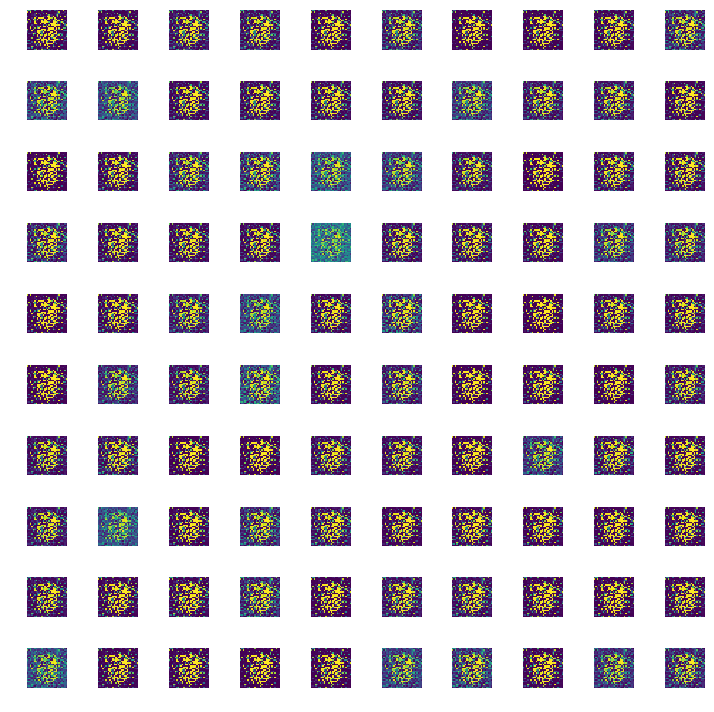

  2%|▏         | 2/128 [00:00<00:07, 16.71it/s]

Epoch 2


  3%|▎         | 4/128 [00:00<00:03, 37.77it/s]

Epoch 3


  4%|▍         | 5/128 [00:00<00:03, 40.60it/s]

Epoch 4


  3%|▎         | 4/128 [00:00<00:03, 38.57it/s]

Epoch 5


100%|██████████| 128/128 [00:03<00:00, 38.92it/s]


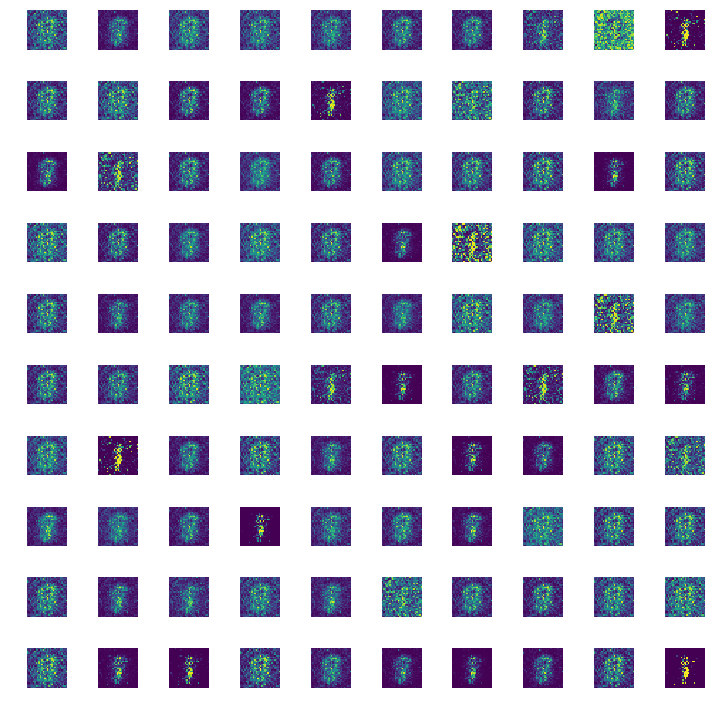

  2%|▏         | 3/128 [00:00<00:04, 29.82it/s]

Epoch 6


  3%|▎         | 4/128 [00:00<00:03, 39.78it/s]

Epoch 7


  3%|▎         | 4/128 [00:00<00:03, 39.66it/s]

Epoch 8


  3%|▎         | 4/128 [00:00<00:03, 38.60it/s]

Epoch 9


  3%|▎         | 4/128 [00:00<00:03, 35.62it/s]

Epoch 10


100%|██████████| 128/128 [00:03<00:00, 38.85it/s]


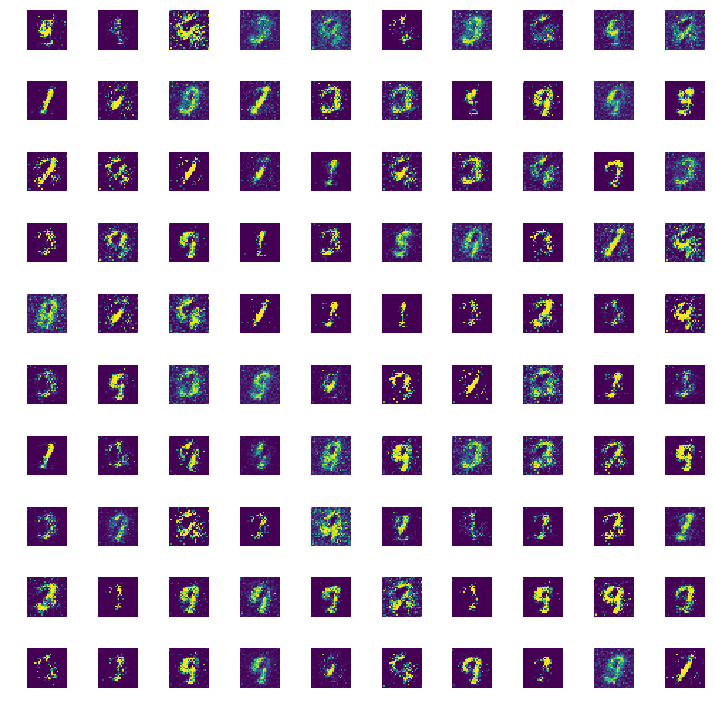

  2%|▏         | 2/128 [00:00<00:07, 16.68it/s]

Epoch 11


  3%|▎         | 4/128 [00:00<00:03, 39.94it/s]

Epoch 12


  3%|▎         | 4/128 [00:00<00:03, 38.98it/s]

Epoch 13


  3%|▎         | 4/128 [00:00<00:03, 35.41it/s]

Epoch 14


  4%|▍         | 5/128 [00:00<00:03, 40.81it/s]

Epoch 15


100%|██████████| 128/128 [00:03<00:00, 39.05it/s]


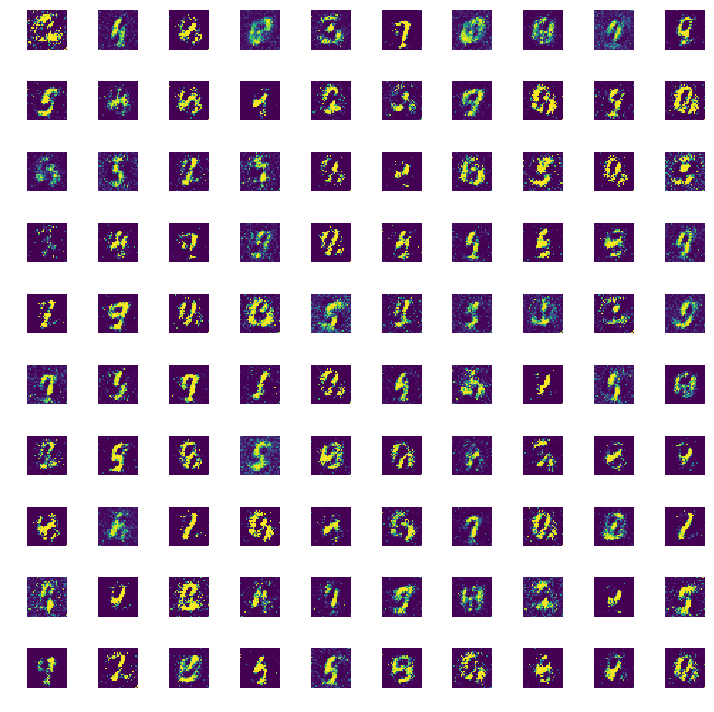

  2%|▏         | 2/128 [00:00<00:08, 14.90it/s]

Epoch 16


  4%|▍         | 5/128 [00:00<00:03, 40.66it/s]

Epoch 17


  4%|▍         | 5/128 [00:00<00:03, 40.50it/s]

Epoch 18


  3%|▎         | 4/128 [00:00<00:03, 38.62it/s]

Epoch 19


  3%|▎         | 4/128 [00:00<00:03, 39.49it/s]

Epoch 20


100%|██████████| 128/128 [00:03<00:00, 39.27it/s]


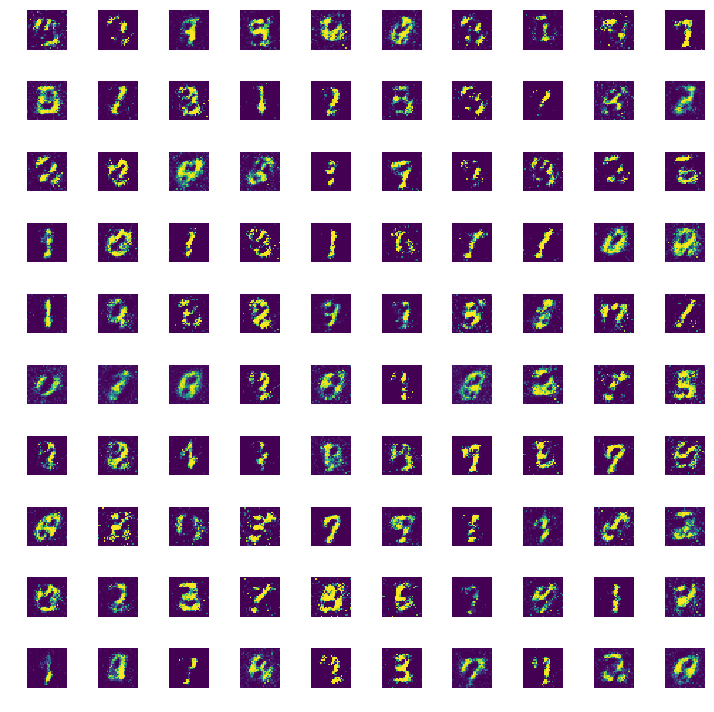

  2%|▏         | 2/128 [00:00<00:07, 16.92it/s]

Epoch 21


  3%|▎         | 4/128 [00:00<00:03, 36.22it/s]

Epoch 22


  3%|▎         | 4/128 [00:00<00:03, 36.34it/s]

Epoch 23


  3%|▎         | 4/128 [00:00<00:03, 39.34it/s]

Epoch 24


  3%|▎         | 4/128 [00:00<00:03, 39.28it/s]

Epoch 25


100%|██████████| 128/128 [00:03<00:00, 38.99it/s]


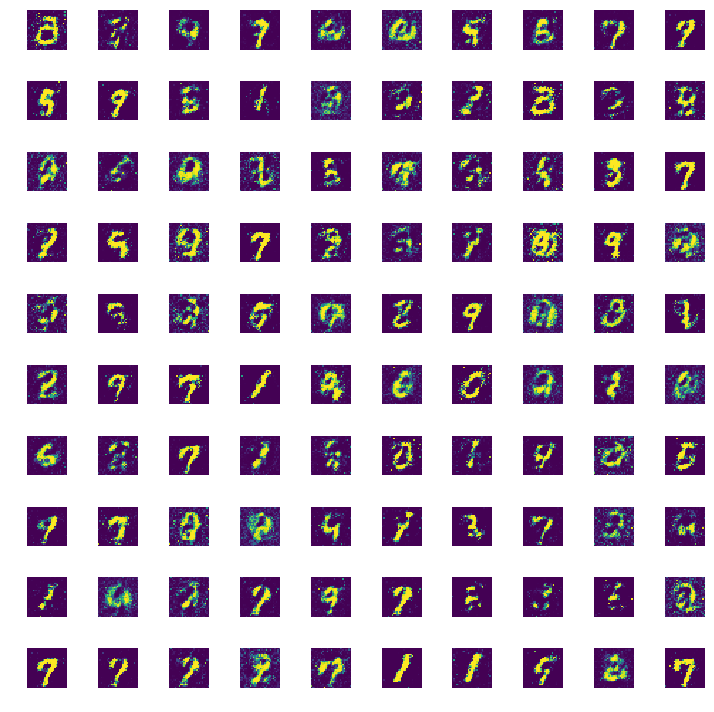

  2%|▏         | 3/128 [00:00<00:07, 17.26it/s]

Epoch 26


  3%|▎         | 4/128 [00:00<00:03, 39.36it/s]

Epoch 27


  3%|▎         | 4/128 [00:00<00:03, 38.86it/s]

Epoch 28


  3%|▎         | 4/128 [00:00<00:03, 39.79it/s]

Epoch 29


  3%|▎         | 4/128 [00:00<00:03, 34.97it/s]

Epoch 30


100%|██████████| 128/128 [00:03<00:00, 36.74it/s]


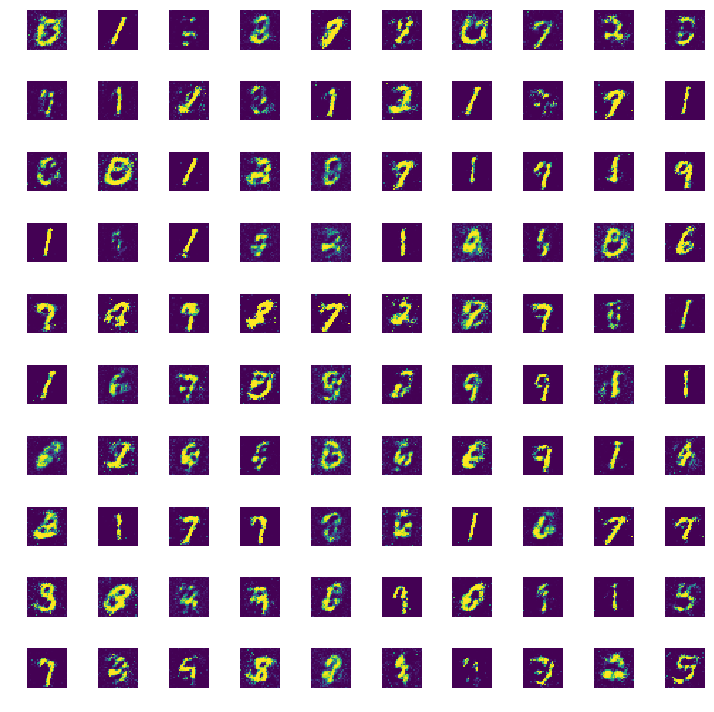

  2%|▏         | 3/128 [00:00<00:05, 23.84it/s]

Epoch 31


  3%|▎         | 4/128 [00:00<00:03, 35.92it/s]

Epoch 32


  3%|▎         | 4/128 [00:00<00:03, 37.42it/s]

Epoch 33


  3%|▎         | 4/128 [00:00<00:03, 39.44it/s]

Epoch 34


  3%|▎         | 4/128 [00:00<00:03, 36.86it/s]

Epoch 35


100%|██████████| 128/128 [00:03<00:00, 38.00it/s]


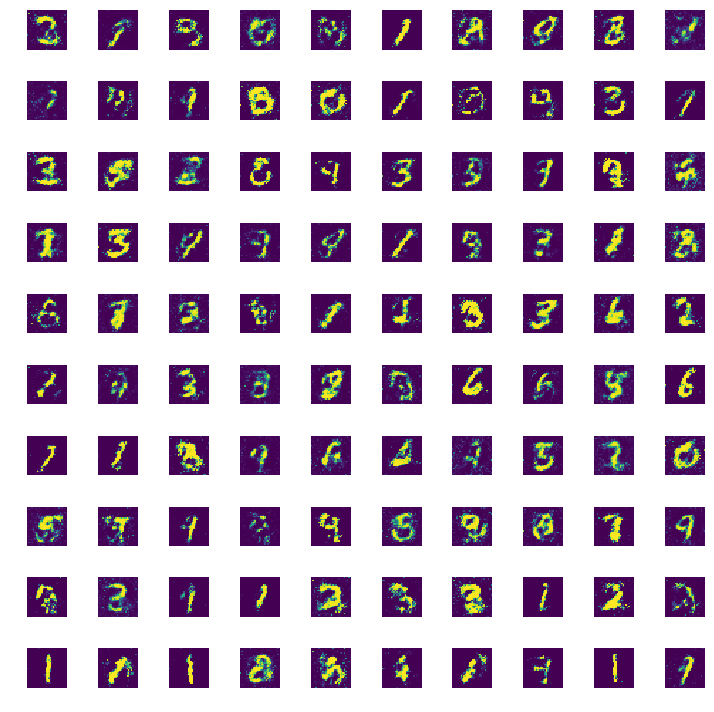

  2%|▏         | 2/128 [00:00<00:11, 10.59it/s]

Epoch 36


  4%|▍         | 5/128 [00:00<00:02, 41.16it/s]

Epoch 37


  3%|▎         | 4/128 [00:00<00:03, 38.23it/s]

Epoch 38


  4%|▍         | 5/128 [00:00<00:03, 40.96it/s]

Epoch 39


  3%|▎         | 4/128 [00:00<00:03, 38.33it/s]

Epoch 40


100%|██████████| 128/128 [00:03<00:00, 38.61it/s]


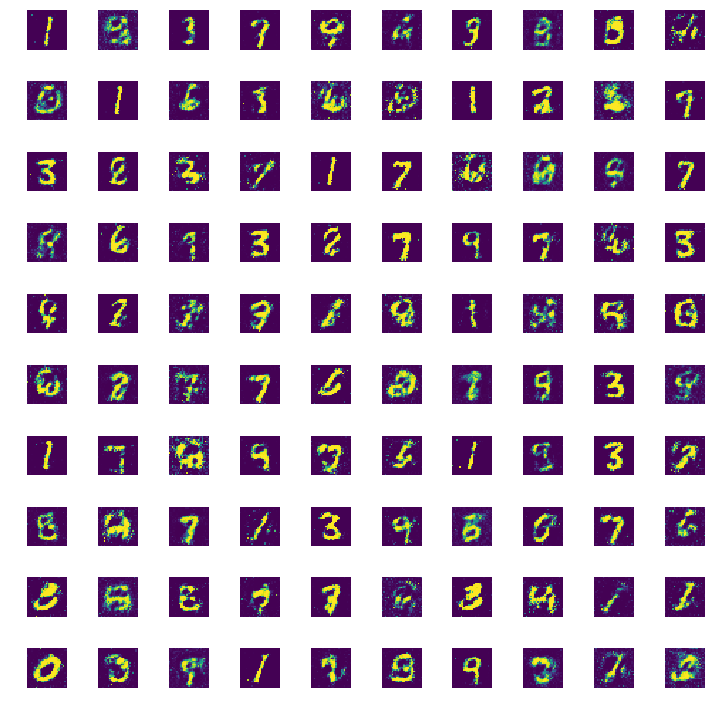

  2%|▏         | 2/128 [00:00<00:06, 18.85it/s]

Epoch 41


  4%|▍         | 5/128 [00:00<00:03, 40.81it/s]

Epoch 42


  3%|▎         | 4/128 [00:00<00:03, 35.87it/s]

Epoch 43


  3%|▎         | 4/128 [00:00<00:03, 39.45it/s]

Epoch 44


  4%|▍         | 5/128 [00:00<00:03, 40.67it/s]

Epoch 45


100%|██████████| 128/128 [00:03<00:00, 39.17it/s]


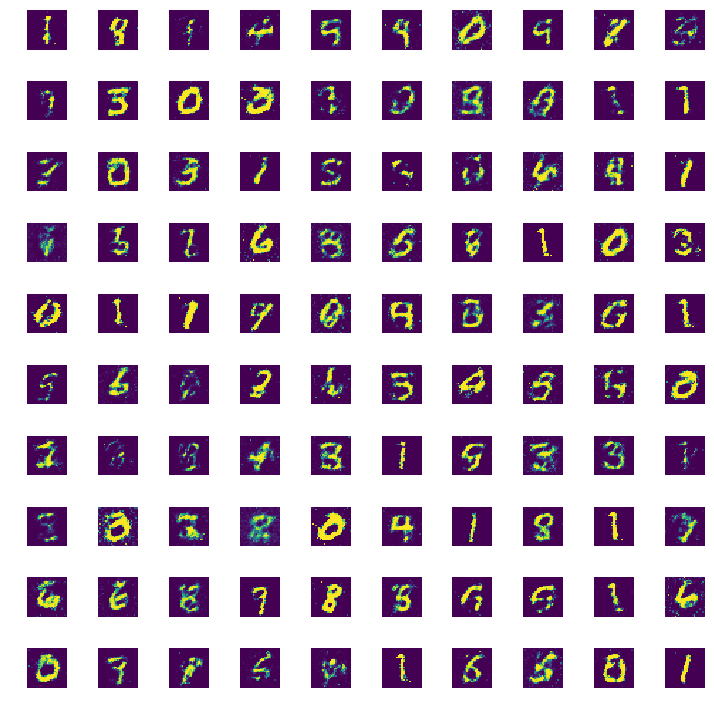

  2%|▏         | 2/128 [00:00<00:07, 17.94it/s]

Epoch 46


  4%|▍         | 5/128 [00:00<00:03, 40.88it/s]

Epoch 47


  3%|▎         | 4/128 [00:00<00:03, 39.88it/s]

Epoch 48


  3%|▎         | 4/128 [00:00<00:03, 39.77it/s]

Epoch 49


  4%|▍         | 5/128 [00:00<00:03, 38.75it/s]

Epoch 50


100%|██████████| 128/128 [00:03<00:00, 38.83it/s]


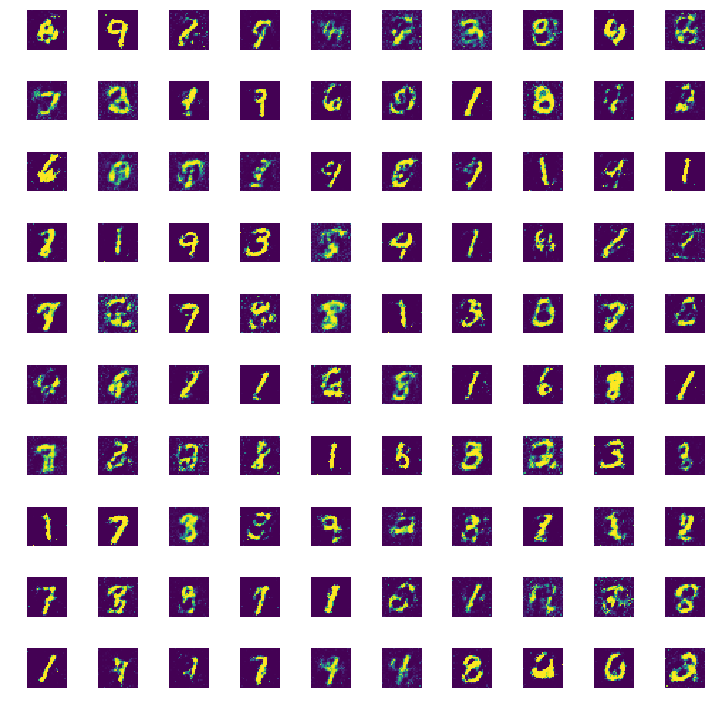

  2%|▏         | 3/128 [00:00<00:04, 28.96it/s]

Epoch 51


 89%|████████▉ | 114/128 [00:03<00:00, 39.24it/s]


KeyboardInterrupt: ignored

In [0]:
def training(epochs=1, batch_size=128):
    
    #Loading the data
    (X_train, y_train, X_test, y_test) = load_data()
    batch_count = X_train.shape[0] / batch_size
    
    # Creating GAN
    generator= create_generator()
    discriminator= create_discriminator()
    gan = create_gan(discriminator, generator)
    
    for e in range(1,epochs+1 ):
        print("Epoch %d" %e)
        for _ in tqdm(range(batch_size)):
        #generate  random noiseas an input  to  initialize the  generator
            noise= np.random.normal(0,1, [batch_size, 100])
            
            # Generate fake MNIST images from noised input
            generated_images = generator.predict(noise)
            
            # Get a random set of  real images
            image_batch = X_train[np.random.randint(low=0,high=X_train.shape[0],size=batch_size)]
            
            #Construct different batches of  real and fake data 
            X= np.concatenate([image_batch, generated_images])
            
            # Labels for generated and real data
            y_dis=np.zeros(2*batch_size)
            y_dis[:batch_size]=0.9
            
            #Pre train discriminator on  fake and real data  before starting the gan. 
            discriminator.trainable=True
            discriminator.train_on_batch(X, y_dis)
            
            #Tricking the noised input of the Generator as real data
            noise= np.random.normal(0,1, [batch_size, 100])
            y_gen = np.ones(batch_size)
            
            # During the training of gan, 
            # the weights of discriminator should be fixed. 
            #We can enforce that by setting the trainable flag
            discriminator.trainable=False
            
            #training  the GAN by alternating the training of the Discriminator 
            #and training the chained GAN model with Discriminator’s weights freezed.
            gan.train_on_batch(noise, y_gen)
            
        if e == 1 or e % 5 == 0:
            plot_generated_images(e, generator)
            
training(100,128)

In [0]:
!mkdir images

mkdir: cannot create directory ‘images’: File exists


In [0]:
!ls

'gan_generated_image 100.png'  'gan_generated_image 5.png'
'gan_generated_image 10.png'   'gan_generated_image 60.png'
'gan_generated_image 15.png'   'gan_generated_image 65.png'
'gan_generated_image 1.png'    'gan_generated_image 70.png'
'gan_generated_image 20.png'   'gan_generated_image 75.png'
'gan_generated_image 25.png'   'gan_generated_image 80.png'
'gan_generated_image 30.png'   'gan_generated_image 85.png'
'gan_generated_image 35.png'   'gan_generated_image 90.png'
'gan_generated_image 40.png'   'gan_generated_image 95.png'
'gan_generated_image 45.png'    images
'gan_generated_image 50.png'    sample_data
'gan_generated_image 55.png'


In [0]:
!zip -r /content/images.zip /content/images

  adding: content/images/ (stored 0%)
  adding: content/images/gan_generated_image 15.png (deflated 2%)
  adding: content/images/gan_generated_image 35.png (deflated 3%)
  adding: content/images/gan_generated_image 5.png (deflated 2%)
  adding: content/images/gan_generated_image 25.png (deflated 2%)
  adding: content/images/gan_generated_image 20.png (deflated 3%)
  adding: content/images/gan_generated_image 40.png (deflated 3%)
  adding: content/images/gan_generated_image 45.png (deflated 3%)
  adding: content/images/gan_generated_image 10.png (deflated 2%)
  adding: content/images/gan_generated_image 1.png (deflated 2%)
  adding: content/images/gan_generated_image 30.png (deflated 3%)
  adding: content/images/gan_generated_image 50.png (deflated 3%)


In [0]:
from google.colab import files
files.download('images.zip')